In [1]:
#Import Library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression  

In [2]:
#Load dataset
df = pd.read_csv(r'https://raw.githubusercontent.com/cvinnn/Data-Mining/refs/heads/main/Week%206/Breast%20Cancer%20Wisconsin.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#Explore dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
#Data Cleaning
dropped_df = df.drop(columns=['Unnamed: 32'])

In [5]:
#Check if null
dropped_df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
#Data preprosessing untuk memisahkan data
X = dropped_df.drop('diagnosis', axis=1)  
y = dropped_df['diagnosis']  

In [7]:
#Data training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Modeling

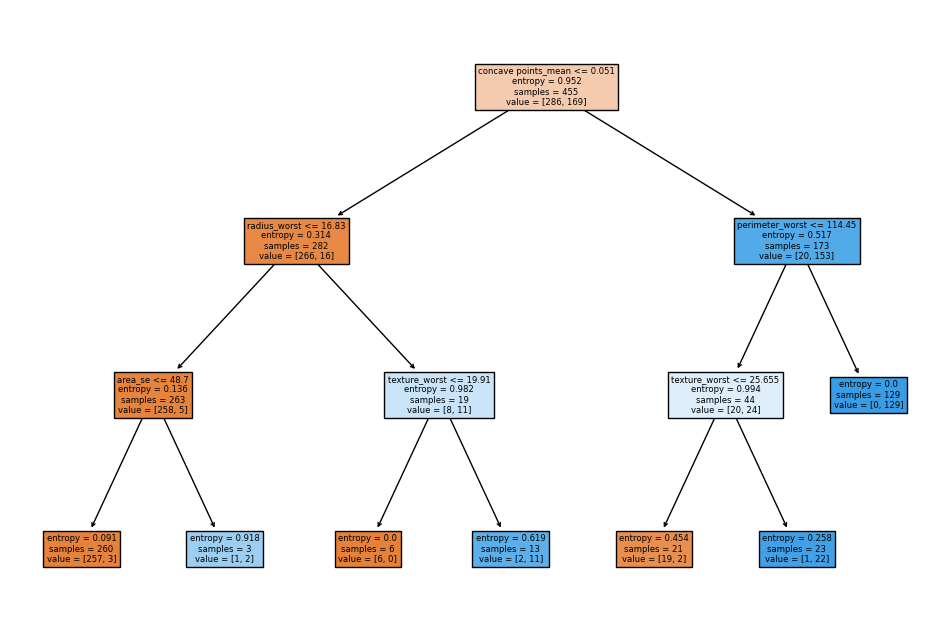

Akurasi (Entropy): 0.96
Akurasi pada data pelatihan (Entropy): 0.98


In [8]:
# Decision Tree untuk prediksi menggunakan model Decision Tree
dt_entropy = DecisionTreeClassifier(criterion='entropy',max_depth = 3, random_state=42)
dt_entropy.fit(X_train, y_train)
y_pred_entropy = dt_entropy.predict(X_test)

# Untuk Memunculkan Decision Treenya
plt.figure(figsize=(12, 8))
plt.title("Decision Tree (Entropy)")
plot_tree(dt_entropy, filled=True, feature_names=X.columns)
plt.show()

# Untuk Mengetahui Akurasi Algoritma Entropy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Akurasi (Entropy): {accuracy_entropy:.2f}")

# Untuk Mengetahui Akurasi Pada Pelatihan Data Dengan Algoritma Entropy
train_accuracy_entropy = accuracy_score(y_train, dt_entropy.predict(X_train))
print(f"Akurasi pada data pelatihan (Entropy): {train_accuracy_entropy:.2f}")

In [9]:
# Naive Bayes untuk prediksi menggunakan model Naive Bayes
nb_model = GaussianNB()  
nb_model.fit(X_train, y_train)  
nb_predictions = nb_model.predict(X_test) 

# Untuk Mengetahui Akurasi Naive Bayes
accuracy_nb = accuracy_score(y_test, nb_predictions)  
print(f"Akurasi Naive Bayes: {accuracy_nb:.2f}")  

Akurasi Naive Bayes: 0.61


In [10]:
# Logistic Regression untuk prediksi menggunakan model Logistic Regression
lr_model = LogisticRegression(max_iter=200, random_state=42)  
lr_model.fit(X_train, y_train)  
lr_predictions = lr_model.predict(X_test)  

# Untuk Mengetahui Akurasi Logistic Regression  
accuracy_lr = accuracy_score(y_test, lr_predictions)  
print(f"Akurasi Logistic Regression: {accuracy_lr:.2f}")

Akurasi Logistic Regression: 0.96
